In [2]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

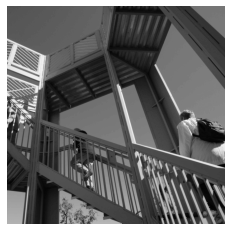

In [3]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [6]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


In [24]:
filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
#filter could be valued by other values.
weight =1

## Convolution Process

Below this paragraph I try to generate a code to represent the process of convolution. In CNN, convolution is a filter (could be (3 x 3), (5 x 5), etc, in size. However, people ussually use filter with size of #odd number by odd number) used to extract feature from an image. The process is very simple, in which we look for every pixel in the image. And for each pixel we calculate the convolution value by looking at its neighbors and multiply the value of the neighbor pixel by the value of the convolution filter. In the end, we sum up all of the result of value and multiply the sum with a weight.

In this project, I utilize filter with 3 x3 in size.

In [27]:
for x in range(1,size_x-1):
    for y in range(1, size_y-1):
        convolution=0.0
        convolution += (filter[0][0]*i[x-1][y-1])
        convolution += (filter[0][1]*i[x-1][y])
        convolution += (filter[0][2]*i[x-1][y+1])
        convolution += (filter[1][0]*i[x][y-1])
        convolution += (filter[1][1]*i[x][y])
        convolution += (filter[1][2]*i[x][y+1])
        convolution += (filter[2][0]*i[x+1][y-1])
        convolution += (filter[2][1]*i[x+1][y])
        convolution += (filter[2][2]*i[x+1][y+1])
        convolution *= weight
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        i_transformed[x,y] = convolution

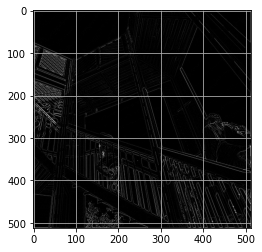

In [28]:
plt.gray()
plt.grid('False')
plt.imshow(i_transformed)
plt.show()

## MaxPooling

In this project I explored the operation of Max Pooling. Actually, there are 3 types of pooling, which are Maximum pooling, Minimum Pooling, and Average Pooling. 

The code below try to reduce the amount of data from convolution by pooling the maximum value from 4 x 4 pixels in the images. This process try to summarize the information or feature of the images. 

In [30]:
new_x = int(size_x/4)
new_y = int(size_y/4)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 4):
    for y in range(0, size_y, 4):
        pixels = []
        pixels.append(i_transformed[x,y])
        pixels.append(i_transformed[x,y+1])
        pixels.append(i_transformed[x,y+2])
        pixels.append(i_transformed[x,y+3])
        pixels.append(i_transformed[x+1,y])
        pixels.append(i_transformed[x+1, y+1])
        pixels.append(i_transformed[x+1, y+2])
        pixels.append(i_transformed[x+1, y+3])
        pixels.append(i_transformed[x+2, y])
        pixels.append(i_transformed[x+2, y+1])
        pixels.append(i_transformed[x+2, y+2])
        pixels.append(i_transformed[x+2, y+3])
        pixels.append(i_transformed[x+3, y])
        pixels.append(i_transformed[x+3, y+1])
        pixels.append(i_transformed[x+3, y+2])
        pixels.append(i_transformed[x+3, y+3])
        pixels.sort(reverse=True)
        newImage[int(x/4),int(y/4)]=pixels[0]

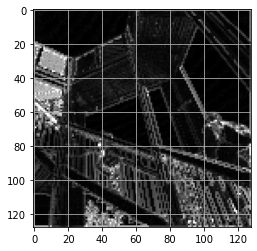

In [31]:
plt.gray()
plt.grid('False')
plt.imshow(newImage)
plt.show()